<a href="https://colab.research.google.com/github/llpk79/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Paul%20K%20Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

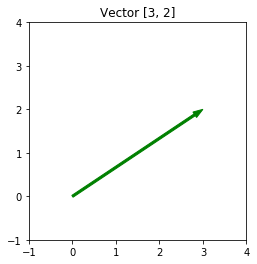

In [58]:
a = np.array([0, 0, 3, 2])

fig = plt.figure()
ax = fig.gca()
ax.arrow(*a, width=.05, length_includes_head=True, color='g')
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 4)
ax.set_aspect('equal')
plt.title('Vector [3, 2]');

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [0]:
def norm(a):
  norm = 0
  for x in a:
    norm += x**2
  return norm**0.5

In [60]:
norm_b = norm(np.array([17, -4, -2, 1]))
norm_b                 

17.60681686165901

A norm of a vector represents its length.

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [0]:
def dot_product(a, b):
  product = 0  
  if len(a) != len(b):
    return 'Vectors must be of equal length'
  for x, y in zip(a, b):
    product += x * y
  return product

In [62]:
cdotd = dot_product(np.array([3, 7, -2, 12]), np.array([9, -7, 4, 6]))
cdotd

42

The dot product is non-zero so the vectors are not orthogonal.

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [63]:
e = np.array([[7, 4, 2], [1, 3, -1], [2, 6, -4]])

# Find the inverse.
e_inv = np.linalg.inv(e)

# Find the transpose.
e_t = e.T
print(f'Inverse of E:\n{e_inv}\n')
print(f'Transpose of E:\n{e_t}')

Inverse of E:
[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]

Transpose of E:
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [15]:
customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [16]:
# Usually fastest this way, I think.
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [17]:
# Still need the variance
df.var()

customers    98761.904762
snow             8.571429
dtype: float64

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

No. They are on different scales and need to be normalized.

In [18]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


In [19]:
df.corr()

,customers,snow
customers,1.000000,0.728463
snow,0.728463,1.000000


In [0]:
for column in df.columns:
  df[column] = df[column].map(lambda x: x - df[column].mean())
  df[column] = df[column].map(lambda x: x / df[column].std())

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [14]:
df.cov()

,customers,snow
customers,1.000000,0.728463
snow,0.728463,1.000000


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [64]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [65]:
df.shape

(4, 18)

In [22]:
df.isna().sum()

Country               0
Cheese                0
Carcass_Meat          0
Other_Meat            0
Fish                  0
Fats_and_Oils         0
Sugars                0
Fresh_Potatoes        0
Fresh_Veg             0
Other_Veg             0
Processed_Potatoes    0
Processed_Veg         0
Fresh_Fruit           0
Cereals               0
Beverages             0
Soft_Drinks           0
Alcoholic Drinks      0
Confectionery         0
dtype: int64

In [66]:
Y = df['Country']
df = df.drop('Country', axis=1)
df.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


Mmmmm.... carcass meat....

In [0]:
# This seems more straight forward than StandardScalar, but I'll look into it more.
for column in df.columns:
  df[column] = df[column].map(lambda x: x - df[column].mean())
  df[column] = df[column].map(lambda x: x / df[column].std())

In [68]:
df.describe()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
count,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000
mean,0.000000,0.000000,-5.551115e-17,0.000000,1.387779e-17,0.000000,0.000000,5.551115e-17,0.000000,0.000000,2.775558e-17,0.000000,-1.387779e-17,5.551115e-17,-2.775558e-17,0.000000,0.000000
std,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000
min,-1.498124,-1.106061,-1.284421e+00,-1.268698,-9.500914e-01,-0.985239,-1.156878,-1.079939e+00,-1.111157,-1.092053,-9.512233e-01,-1.393554,-7.409501e-01,-9.441978e-01,-1.216104e+00,-1.440533,-1.365425
25%,-0.026515,-0.424242,-4.896854e-01,-0.532853,-6.482977e-01,-0.597604,-0.581552,-7.310355e-01,-0.600187,-0.491424,-8.085398e-01,-0.385779,-6.037371e-01,-5.395416e-01,-5.867170e-01,-0.291935,-0.431187
50%,0.464021,-0.106061,1.230903e-01,0.135328,-1.900183e-01,-0.177666,-0.006226,6.645778e-02,-0.051367,-0.109205,-3.170744e-02,0.294379,-3.567537e-01,-2.248090e-01,9.245237e-02,0.355746,0.263503
75%,0.490536,0.318182,6.127757e-01,0.668181,4.582794e-01,0.419938,0.575326,7.974933e-01,0.548820,0.382219,7.768323e-01,0.680159,2.469834e-01,3.147326e-01,6.791693e-01,0.647681,0.694690
max,0.570083,1.318182,1.038240e+00,0.998043,1.330128e+00,1.340571,1.169331,9.470233e-01,1.213892,1.310463,1.014638e+00,0.804795,1.454458e+00,1.393816e+00,1.031200e+00,0.729040,0.838419


In [98]:
df.dtypes

Cheese                float64
Carcass_Meat          float64
Other_Meat            float64
Fish                  float64
Fats_and_Oils         float64
Sugars                float64
Fresh_Potatoes        float64
Fresh_Veg             float64
Other_Veg             float64
Processed_Potatoes    float64
Processed_Veg         float64
Fresh_Fruit           float64
Cereals               float64
Beverages             float64
Soft_Drinks           float64
Alcoholic Drinks      float64
Confectionery         float64
dtype: object

Mean is zero and Std is one for all columns. Nice.

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [99]:
# This seems more straight forward than PCA, but I'll look into that too.

npdf = df.values
covariance = np.matmul(npdf.T, npdf)
eigvals, eigvects = np.linalg.eig(covariance)
projected = eigvects.T.dot(npdf.T)
projected[:5]

array([[-8.26612447e-01+0.00000000e+00j, -3.91525836e+00+0.00000000e+00j,
         4.22601647e-01+0.00000000e+00j,  4.31926916e+00+0.00000000e+00j],
       [ 2.84332010e-01+0.00000000e+00j, -1.50288288e+00+0.00000000e+00j,
         2.80044205e+00+0.00000000e+00j, -1.58189118e+00+0.00000000e+00j],
       [ 1.58467845e+00+0.00000000e+00j, -6.76722601e-01+0.00000000e+00j,
        -6.62637187e-01+0.00000000e+00j, -2.45318660e-01+0.00000000e+00j],
       [ 3.72333382e-17+1.35713139e-16j, -4.96381276e-16+5.11719250e-16j,
         3.41526580e-16-3.78801240e-18j, -2.01742246e-16-6.89821242e-16j],
       [ 3.72333382e-17-1.35713139e-16j, -4.96381276e-16-5.11719250e-16j,
         3.41526580e-16+3.78801240e-18j, -2.01742246e-16+6.89821242e-16j]])

In [100]:
my_eigvects = projected[:2]
eig_df = pd.DataFrame(my_eigvects.T, columns=['PC_1', 'PC_2'])
eig_df.head()

,PC_1,PC_2
0,(-0.8266124471707696+0j),(0.2843320099343721+0j)
1,(-3.9152583594678094+0j),(-1.5028828803544652+0j)
2,(0.42260164711633497+0j),(2.800442054971461+0j)
3,(4.319269159522244+0j),(-1.5818911845513677+0j)


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


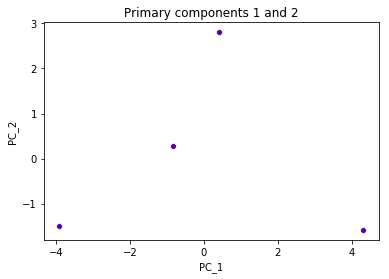

In [101]:
sns.scatterplot('PC_1', 'PC_2', data=eig_df)
plt.title('Primary components 1 and 2');

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [29]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [30]:
points.shape

(200, 2)

In [31]:
sns.choose_dark_palette('hls')

interactive(children=(FloatSlider(value=0.5, description='h', max=1.0), FloatSlider(value=0.5, description='l'…

[array([0.13333333, 0.13333333, 0.13333333, 1.        ]),
 array([0.14614379, 0.20104575, 0.20104575, 1.        ]),
 array([0.15895425, 0.26875817, 0.26875817, 1.        ]),
 array([0.17222222, 0.33888889, 0.33888889, 1.        ]),
 array([0.18503268, 0.40660131, 0.40660131, 1.        ]),
 array([0.19830065, 0.47673203, 0.47673203, 1.        ]),
 array([0.21111111, 0.54444444, 0.54444444, 1.        ]),
 array([0.22437908, 0.61457516, 0.61457516, 1.        ]),
 array([0.23718954, 0.68228758, 0.68228758, 1.        ]),
 array([0.25, 0.75, 0.75, 1.  ])]

Just found that. Not sure how to use it yet. lol

In [0]:
sns.set_palette('plasma', n_colors=5)

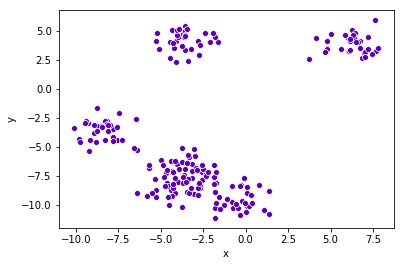

In [33]:
sns.scatterplot('x', 'y', data=points);

In [0]:
from sklearn.cluster import KMeans

In [0]:
# Five clusters because it looks like five clusters. :P
means = KMeans(n_clusters=5)
means.fit(points.values)
labels = means.labels_
centers = means.cluster_centers_

In [36]:
print(labels)
print(centers)

[0 4 1 0 1 4 0 0 3 4 4 4 1 4 0 1 0 4 4 2 0 2 2 2 4 4 1 3 4 4 4 4 1 2 4 4 4
 4 3 1 1 2 3 3 3 4 4 4 0 1 2 0 0 3 2 1 4 3 3 0 2 1 0 3 2 3 2 3 0 3 4 4 4 4
 2 2 4 4 3 2 3 4 4 4 3 4 3 4 4 2 3 4 2 4 1 4 4 4 4 1 4 4 0 4 4 2 0 0 0 2 1
 2 4 0 1 4 3 3 2 3 2 1 4 0 4 0 4 2 3 0 1 0 4 0 3 3 1 2 0 4 3 4 4 2 1 3 4 3
 0 4 4 1 0 2 4 3 1 2 4 0 1 4 3 0 2 2 1 3 1 1 0 1 3 2 1 4 4 4 4 0 4 1 4 4 1
 4 0 2 3 1 4 0 2 0 4 3 2 2 1 1]
[[-8.36652987 -3.61238083]
 [-0.47611541 -9.49475417]
 [ 6.24979318  3.84457183]
 [-3.59740679  4.13344099]
 [-3.7805392  -7.60590614]]


In [0]:
points['cluster'] = pd.Series(labels)

In [0]:
def plt_clusters(df):
  sns.scatterplot('x', 'y', hue='cluster', data=df)
  plt.scatter(centers[0][0], centers[0][1], color='b')
  plt.scatter(centers[1][0], centers[1][1], color='r')
  plt.scatter(centers[2][0], centers[2][1], color='g')
  plt.scatter(centers[3][0], centers[3][1], color='violet')
  plt.scatter(centers[4][0], centers[4][1], color='y')

  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.title("x and y clustered.\nCluster centers marked with darker dot.");

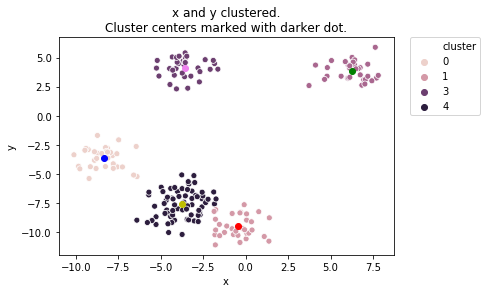

In [39]:
plt_clusters(points)

Hold up. Wait a minute!

I forgot to standardize. I'm just going to experiment a bit.

In [0]:
norm_points = points.copy()

In [0]:
for column in norm_points.columns:
  norm_points[column] = norm_points[column].map(lambda x: x - norm_points[column].mean())

In [42]:
points.head()

,x,y,cluster
0,-7.846803,-3.421277,0
1,-3.554323,-6.884729,4
2,-0.192822,-9.671030,1
3,-6.401456,-5.223972,0
4,-0.804026,-9.704457,1


In [43]:
norm_points.head()

,x,y,cluster
0,-5.523504,0.001592,-2.365
1,-1.231025,-3.461860,1.635
2,2.130476,-6.248161,-1.365
3,-4.078157,-1.801103,-2.365
4,1.519272,-6.281588,-1.365


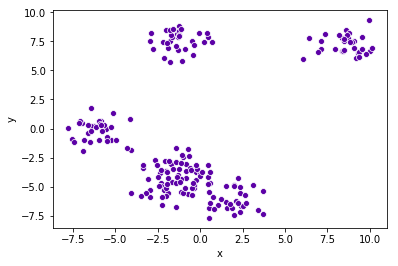

In [44]:
sns.scatterplot('x', 'y', data=norm_points);

In [0]:
norm_points = norm_points.drop('cluster', axis=1)

In [0]:
means = KMeans(n_clusters=5)
means.fit(norm_points.values)
labels = means.labels_
centers = means.cluster_centers_

In [47]:
print(labels)
print(centers)

[3 0 4 3 4 0 3 3 1 0 0 0 4 0 3 4 3 0 0 2 3 2 2 2 0 0 4 1 0 0 0 0 4 2 0 0 0
 0 1 4 4 2 1 1 1 0 0 0 3 4 2 3 3 1 2 4 0 1 1 3 2 4 3 1 2 1 2 1 3 1 0 0 0 0
 2 2 0 0 1 2 1 0 0 0 1 0 1 0 0 2 1 0 2 0 4 0 0 0 0 4 0 0 3 0 0 2 3 3 3 2 4
 2 0 3 4 0 1 1 2 1 2 4 0 3 0 3 0 2 1 3 4 3 0 3 1 1 4 2 3 0 1 0 0 2 4 1 0 1
 3 0 0 4 3 2 0 1 4 2 0 3 4 0 1 3 2 2 4 1 4 4 3 4 1 2 4 0 0 0 0 3 0 4 0 0 4
 0 3 2 1 4 0 3 2 3 0 1 2 2 4 4]
[[-1.45724103 -4.18303713]
 [-1.27410863  7.55631   ]
 [ 8.57309134  7.26744083]
 [-6.0432317  -0.18951183]
 [ 1.84718275 -6.07188516]]


In [0]:
norm_points['cluster'] = pd.Series(labels)

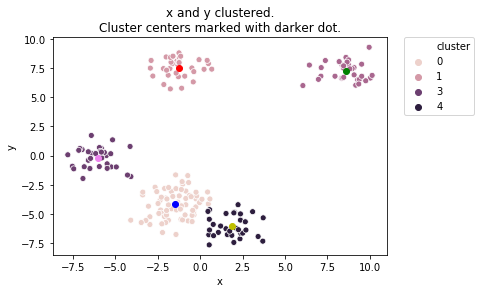

In [49]:
plt_clusters(norm_points)

In [0]:
stand_points = norm_points.copy()
stand_points = stand_points.drop('cluster', axis=1)

In [0]:
for column in stand_points.columns:
  stand_points[column] = stand_points[column].map(lambda x: x / stand_points[column].std())

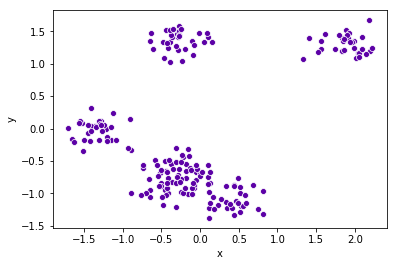

In [52]:
sns.scatterplot('x', 'y', data=stand_points);

In [0]:
means = KMeans(n_clusters=5)
means.fit(stand_points.values)
labels = means.labels_
centers = means.cluster_centers_

In [54]:
print(labels)
print(centers)

[3 0 4 3 4 0 3 3 2 0 0 0 4 0 3 4 3 0 0 1 3 1 1 1 0 0 4 2 0 0 0 0 4 1 0 0 0
 0 2 4 4 1 2 2 2 0 0 0 3 4 1 3 3 2 1 4 0 2 2 3 1 4 3 2 1 2 1 2 3 2 0 0 0 0
 1 1 0 0 2 1 2 0 0 0 2 0 2 0 0 1 2 0 1 0 4 0 0 0 0 4 0 0 3 0 0 1 3 3 3 1 4
 1 0 3 4 0 2 2 1 2 1 4 0 3 0 3 0 1 2 3 4 3 0 3 2 2 4 1 3 0 2 0 0 1 4 2 0 2
 3 0 0 4 3 1 0 2 4 1 0 3 4 0 2 3 1 1 4 2 4 4 3 4 2 1 4 0 0 0 0 3 0 4 0 0 4
 0 3 1 2 4 0 3 1 3 0 2 1 1 4 4]
[[-0.31981496 -0.74952897]
 [ 1.88150266  1.30220156]
 [-0.27962361  1.35396199]
 [-1.32628431 -0.03395729]
 [ 0.40539394 -1.08797835]]


In [0]:
stand_points['cluster'] = pd.Series(labels)

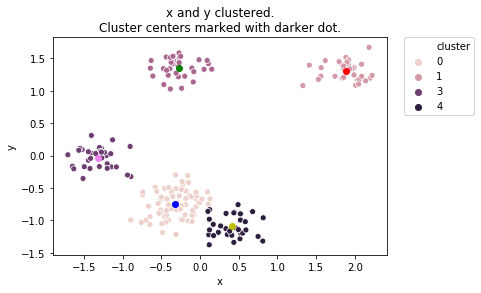

In [56]:
plt_clusters(stand_points)

That's much better. Apples to apples and all that.